In [2]:
import pandas as pd
import numpy as np

# 1. Load data

In [3]:
data = pd.read_csv('Data/ecoli.csv', sep=';')
data.head(5)

/tmp/ipykernel_1604714/1427946605.py:1: DtypeWarning: Columns (27,29,30,31,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/ecoli.csv', sep=';')


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL424566,NaN,NaN,275.26,0.0,-0.90,1d,O=C1c2c([n+]([O-])c3ccccc3[n+]2[O-])CCN1CCO,MIC,'=',...,ORGANISM,CHEMBL1122100,1,Scientific Literature,J Med Chem,1982.0,NaN,NaN,NaN,NaN
1,CHEMBL1835193,NaN,NaN,418.46,0.0,2.33,5u,COc1ccc2nc(N3CCOCC3)c(C3C(C#N)=C(N)Oc4[nH]nc(C...,MIC,'=',...,ORGANISM,CHEMBL1833797,1,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN
2,CHEMBL34134,NaN,NaN,913.10,3.0,6.98,16,COC1/C=C/OC2(C)Oc3c(C)c(O)c4c(O)c(c5sc(N6CCN(C...,MIC,'=',...,ORGANISM,CHEMBL1124774,1,Scientific Literature,J Med Chem,1990.0,NaN,NaN,NaN,NaN
3,CHEMBL28682,NaN,NaN,363.41,0.0,1.70,18,CN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)c2n3CCS2)CC1,pMIC,'=',...,ORGANISM,CHEMBL1125906,1,Scientific Literature,J Med Chem,1991.0,NaN,NaN,NaN,NaN
4,CHEMBL1802185,NaN,NaN,432.79,0.0,0.88,17b,O=C([O-])c1ccc(-c2ccc(O[C@H]3O[C@H](CO)[C@@H](...,FC,'=',...,ORGANISM,CHEMBL1799951,1,Scientific Literature,J Med Chem,2010.0,NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [14]:
data["Standard Type"].unique()

array(['MIC', 'pMIC', 'FC', 'IZ', 'ED50', 'Antibacterial activity',
       'Zone of inhibition', 'Activity', 'GI', 'MIC80', 'EC50', 'IC50',
       'Ratio', 'MIC90', 'MIC50', 'MBC', 'Diffusion analysis', 'PD50',
       'Dobs', 'Log 1/MIC', 'Inhibition', 'Log 1/C', 'MLC',
       'Zone of stimulation', 'FIC', 'Max salt tolerance', 'TIME',
       'Inhibitory diameter', 'pKa2', 'Antibiotic resistance', 'MBC99.9',
       'MIC95', 'Relative potency', 'Log k', 'log10CFU/ml', 'Drug uptake',
       'DIZ', 'Ks', 'k_on', 'Susceptibility', 'I50', 'Log2 MIC',
       '-logMIC', 'CFU', 'FICI', 'PAE', 'Cell growth', 'MBC>99.9',
       'Concentration', 'MIC99', 'log10CFU/g', '-Log MIC', 'MIC70', 'MED',
       'log10cfu', 'Stability', 'MIC>90', 'permeability', 'MPC', 'Kd',
       'Survival', 'EC37', '-log(1/MIC)', 'fT>MIC', 'MIC>95', 'MIC=>90',
       'Diameter', 'Inhibition zone', 'DW', 'Absorbance', 'Km',
       'log(1/MIC)', 'Log SOSIP', 'Growth zone', 'Zone size', 'ED100',
       'Ki', 'MIC100', 'IC9

In [33]:
ic50_count = (data['Standard Type'] == 'I50').sum()
print(f'Count of "IC50" in "Standard Type": {ic50_count}')

Count of "IC50" in "Standard Type": 0


In [13]:
ic50_count = (data['Standard Type'] == 'IC50').sum()
print(f'Count of "IC50" in "Standard Type": {ic50_count}')

Count of "IC50" in "Standard Type": 2579


# 2. Preprocessing

In [15]:
import sys
sys.path.append('./Codebase/Preprocessor')
from Targetcurate import target_curate
from Assaycurate import assay_curate
from Smilecurate import smile_curate

In [16]:
columns = ['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Data Validity Comment',
          'Assay Type', 'Assay Description','Assay Organism', 'Assay Variant Mutation','Target Name','Target Organism', 'Document Journal']

df = data[columns]

## 2.1. Target value standardize (Standard)

In [17]:
df['Target Name'].unique()

array(['Escherichia coli'], dtype=object)

In [18]:
df['Target Organism'].unique()

array(['Escherichia coli'], dtype=object)

In [20]:
target = target_curate(data =df, target_name_col = 'Target Name', target_name ='Escherichia coli', 
                       target_org_col='Target Organism', target_org = 'Escherichia coli',
                            type_col='Standard Type', unit_col='Standard Units', active_col='Standard Value', 
                            relate_col='Standard Relation', type_arg ='IC50',equal_only = False, thresh = 5)
target.curated_fit()

Number of data before target curation: 133304


(133304, 15)

(133304, 15)

Number of data after handle organism and target name: 133304
Number of data after select unit: 1916
HANDLING
Number of data after standardizing: 1465


/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/./Codebase/Preprocessor/Targetcurate.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big.drop(drop_idx, inplace = True)
/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/./Codebase/Preprocessor/Targetcurate.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small.drop(drop_idx, inplace = True)


In [21]:
df1 = target.df

## 2.2. Assay

In [22]:
df1['Assay Type'].unique()

array(['F', 'A'], dtype=object)

In [23]:
df['Assay Organism'].unique()

array(['Escherichia coli', 'Mus musculus', 'escherichia coli kc-14',
       'Escherichia', 'e. coli strain a3228', 'escherichia coli a 15119',
       'escherichia colin', 'Escherichia coli str. K-12 substr. MG1655',
       'Staphylococcus aureus', 'Escherichia coli BL21(DE3)',
       'Pseudomonas aeruginosa'], dtype=object)

In [24]:
assay = assay_curate(data=df1, type_col="Assay Type", org_col="Assay Organism",des_col='Assay Description', 
                     type_arg='F', org_arg='Escherichia coli', kw = '')

assay.curated_fit()

Number of data befor standardizing: 1465
Number of data after choosing assay type: 1426
Number of data after choosing assay organism: 1426
Number of data after curating: 1426


In [25]:
df2 = assay.df
df2.shape

(1426, 16)

## 2.3. Smiles curated

In [26]:
smile = smile_curate(data=df2, smile_col='Smiles', pchem_col='pChEMBL', keep = 'best')
smile.curate()

(1079, 17)


/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/./Codebase/Preprocessor/Smilecurate.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Canonical_Smiles'] = df[smile_col].apply(Chem.CanonSmiles)


In [27]:
df3 = smile.df

In [28]:
df3.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Assay Type,Assay Description,Assay Organism,Assay Variant Mutation,Target Name,Target Organism,Document Journal,pChEMBL,Canonical_Smiles
1173,CHEMBL186155,CCCCC[C@H](CC(=O)NO)C(=O)N[C@H](C(=O)C1CCC[C@H...,IC50,'=',0.7,nM,9.15,NaN,F,In vitro inhibitory activity against Escherich...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Bioorg Med Chem Lett,9.154902,CCCCC[C@H](CC(=O)NO)C(=O)N[C@H](C(=O)C1CCC[C@H...
1264,CHEMBL369559,CC(C)[C@H](NC(=O)C[C@H](NC(=O)/C=C/c1cccc(F)n1...,IC50,'=',1.0,nM,9.00,NaN,F,Inhibitory concentration of the compound again...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Bioorg Med Chem Lett,9.000000,CC(C)[C@H](NC(=O)C[C@H](NC(=O)/C=C/c1cccc(F)n1...
296,CHEMBL362048,CC(C)[C@H](NC(=O)C[C@H](NC(=O)/C=C/C(=O)O)c1cc...,IC50,'=',2.0,nM,8.70,NaN,F,Inhibitory concentration of the compound again...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Bioorg Med Chem Lett,8.698970,CC(C)[C@H](NC(=O)C[C@H](NC(=O)/C=C/C(=O)O)c1cc...
269,CHEMBL180976,COc1cccc(/C=C/C(=O)N[C@@H](CC(=O)N[C@H](C(=O)[...,IC50,'=',4.0,nM,8.40,NaN,F,Inhibitory concentration of the compound again...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Bioorg Med Chem Lett,8.397940,COc1cccc(/C=C/C(=O)N[C@@H](CC(=O)N[C@H](C(=O)[...
1474,CHEMBL4175069,CC(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)N[C@H]1C[C...,IC50,'=',5.3,nM,8.28,NaN,F,Antibacterial activity against Escherichia col...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Eur J Med Chem,8.275724,CC(=O)N[C@@H](Cc1ccccc1)C(=O)NCC(=O)N[C@H]1C[C...


## 2.4. pChEMBL validation

In [29]:
df4 = df3.dropna(subset = 'pChEMBL Value')
df4.shape

(942, 17)

R2= 0.9999904786251309


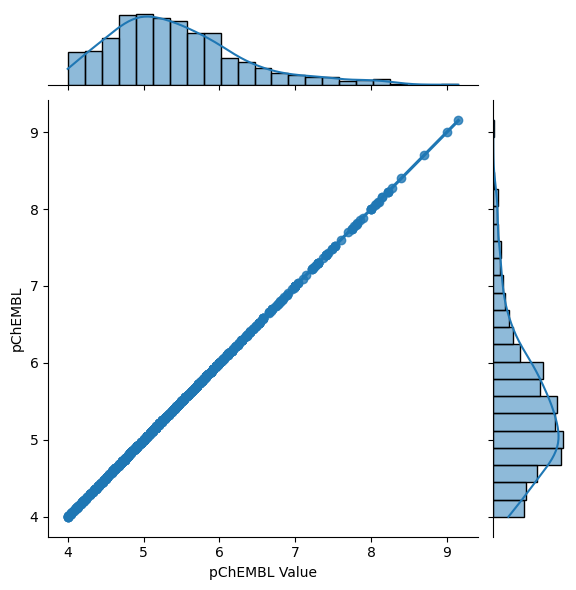

In [30]:
import seaborn as sns
import numpy as np
from scipy import stats
x, y = df4["pChEMBL Value"].values, df4["pChEMBL"].values
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
r2=stats.pearsonr(x, y)[0] ** 2
print('R2=', r2)

sns.jointplot(data = df4, 
    x = "pChEMBL Value",
    y = "pChEMBL", kind="reg")


## 2.5. Save

In [31]:
df3.to_csv('./Data/ecoli_pre.csv')
df4.to_csv('./Data/ecoli_pchem.csv')

In [32]:
import pandas as pd

data=pd.read_csv('/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/Data/ecoli_pchem.csv')
data.shape

(942, 18)